In [73]:
%load_ext autoreload
%autoreload 2
import numpy as np
from IPython.display import HTML, Latex, Markdown, Pretty

from windIO.Plant import WTLayout
from fusedwake.WindFarm import WindFarm
from fusedwake.Plotting import circles

from fusedwake.gcl import GCL
import fusedwake.gcl.fortran as fgcl
import fusedwake.gcl.python as pygcl

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
#filename = 'middelgrunden.yml'
#filename = 'lillgrund.yml'
#filename = 'hornsrev.yml'

#filename = 'test_WF.yml'
#filename = 'test_WF_4.yml'
filename = 'test_WF_2Turbines_Bryce.yml'

#wtl = WTLayout(filename)
wf = WindFarm(yml=filename)

In [75]:
gcl = GCL(WF=wf)

In [85]:
# Inputs
WS=3.99*np.ones([wf.nWT])
WD=270.*np.ones([wf.nWT])#np.random.normal(270.,30.)*np.ones([wf.nWT])#
TI=0.05*np.ones([wf.nWT])

print np.mean(WD)

270.0


(-50, 1000)

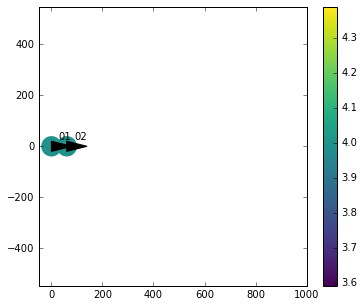

In [86]:
fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
circles(x=wf.xyz[0,:],
        y=wf.xyz[1,:],
        s=np.array(wf.R),
        c=WS, 
        cmap=plt.cm.viridis,lw=0,
        )
plt.colorbar()
for i in range(wf.nWT):
    ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i]+0.7*np.array([wf.R[i],wf.R[i]]))
    ax.arrow(x=wf.xyz[0,i],
          y=wf.xyz[1,i],
          dx=0.5*wf.R[1]*WS[i]*np.cos(np.deg2rad(270-WD[i])),
          dy=0.5*wf.R[1]*WS[i]*np.sin(np.deg2rad(270-WD[i])),
          head_length=2*wf.R[1],head_width=wf.R[1],
          length_includes_head=True,
          fc='k',ec='k',
         )
ax.axis('equal')
ax.set_xlim([-50, 1000])
#ax.set_ylim([-400, 400])




In [87]:
gcl = GCL(WF=wf,WS=WS, WD=WD, TI=TI)
# Run the models
out_fort_gclm_s=gcl(version='fort_gclm')
#print gcl._get_kwargs(version='fort_gclm'),'\n'
print gcl.version, ':', out_fort_gclm_s.p_wt.sum(),'\n'

gcl = GCL(WF=wf,WS=WS, WD=WD, TI=TI)
# Run the models
out_py_gcl_v0=gcl(version='py_gcl_v0')
#print gcl._get_kwargs(version='py_gcl_v0'),'\n'
print gcl.version, ':', out_py_gcl_v0.p_wt.sum(),'\n'

print np.allclose(out_fort_gclm_s.p_wt,out_py_gcl_v0.p_wt)
print np.allclose(out_fort_gclm_s.u_wt,out_py_gcl_v0.u_wt),'\n'

gcl = GCL(WF=wf,WS=WS, WD=WD, TI=TI)
# Run the models
out_py_gcl_v1=gcl(version='py_gcl_v1')
#print gcl._get_kwargs(version='py_gcl_v1'),'\n'
print gcl.version, ':', out_py_gcl_v1.p_wt.sum(),'\n'
print np.allclose(out_fort_gclm_s.p_wt,out_py_gcl_v1.p_wt)
print np.allclose(out_fort_gclm_s.u_wt,out_py_gcl_v1.u_wt),'\n'


fort_gclm : 0.0 

py_gcl_v0 : 0.0 

True
True 

py_gcl_v1 : 0.0 

True
True 



In [88]:
print out_fort_gclm_s.p_wt, out_py_gcl_v0.p_wt, out_py_gcl_v1.p_wt
print out_fort_gclm_s.c_t, out_py_gcl_v0.c_t, out_py_gcl_v1.c_t
print out_fort_gclm_s.u_wt, out_py_gcl_v0.u_wt, out_py_gcl_v1.u_wt

[ 0.  0.] [ 0.  0.] [ 0.  0.]
[ 0.053  0.053] [ 0.053  0.053] [ 0.053  0.053]
[ 3.99        3.88502613] [ 3.99        3.88502613] [ 3.99        3.88502613]


In [89]:
print wf.WT[0].c_t_idle
print wf.WT[0].CT_idle

0.053
0.053


(-60.0, 120.0, -40.0, 40.0)

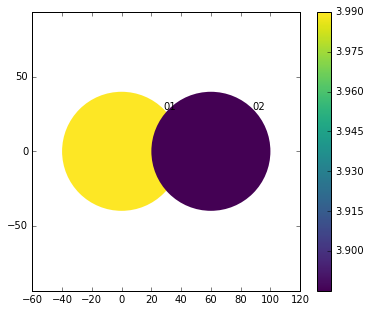

In [90]:
varout=out_py_gcl_v0.u_wt#p_wt/1e6
    
fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
circles(x=wf.xyz[0,:],
        y=wf.xyz[1,:],
        s=np.array(wf.R),
        c=varout,
        cmap=plt.cm.viridis,lw=0,
        )
plt.colorbar()
for i in range(wf.nWT):
    ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i]+0.7*np.array([wf.R[i],wf.R[i]]))
ax.axis('equal')
#ax.set_xlim([-100, 1000])
#ax.set_ylim([-500, 500])

In [103]:
WD = (np.arange(-120,120)+270.)#np.linspace(-50,50,200)+270
WS = 8.
TI = 0.05

In [104]:
P_rat_py_v0 = []
P_rat_py_v1 = []
P_rat_fgclm_rdn = []
for wd in WD:       
    #out = gcl(WF=wf, WS=WS*np.ones([wf.nWT]), WD=wd+np.random.normal(loc=0.0, scale=2, size=[wf.nWT]), 
    #          TI=0.1*np.ones([wf.nWT]), version='fort_gclm')
    #P_rat_fgclm_rdn = np.append(P_rat_fgclm_rdn,out.p_wt[1]/out.p_wt[0])
    
    out = gcl(WS=WS*np.ones([wf.nWT]), WD=wd*np.ones([wf.nWT]), TI=0.1*np.ones([wf.nWT]), version='py_gcl_v1')
    #P_rat_py_v1 = np.append(P_rat_py_v1,out.p_wt[1]/out.p_wt[0])
    P_rat_py_v1 = np.append(P_rat_py_v1,0.5*np.sum(out.p_wt)/np.max(out.p_wt))

    out = gcl(WF=wf, WS=WS*np.ones([wf.nWT]), WD=wd*np.ones([wf.nWT]), TI=0.1*np.ones([wf.nWT]), version='py_gcl_v0')
    #P_rat_py_v0 = np.append(P_rat_py_v0,out.p_wt[1]/out.p_wt[0])
    P_rat_py_v0 = np.append(P_rat_py_v0,0.5*np.sum(out.p_wt)/np.max(out.p_wt))

In [105]:
out = gcl(WF=wf, WS=WS*np.ones_like(WD), WD=WD, TI=0.1*np.ones_like(WD), version='fort_gcl')
#P_rat_fgcl = out.p_wt[:,1]/out.p_wt[:,0]
P_rat_fgcl = 0.5*np.sum(out.p_wt,1)/np.max(out.p_wt,1)

WDm = WD.reshape([-1,1])*np.ones([1,wf.nWT])
out = gcl(WF=wf, WS=WS*np.ones_like(WDm), WD=WDm, TI=0.1*np.ones_like(WDm), version='fort_gclm')
#P_rat_fgclm = out.p_wt[:,1]/out.p_wt[:,0]
P_rat_fgclm = 0.5*np.sum(out.p_wt,1)/np.max(out.p_wt,1)

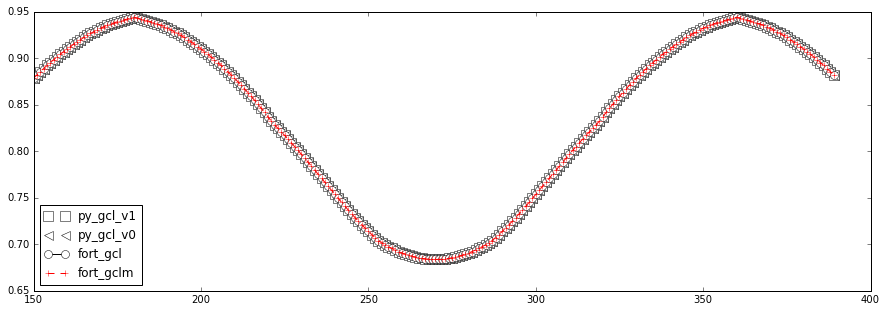

In [106]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(111)

plt.plot(WD,P_rat_py_v1,'sk',ms=10,mfc='w',label ='py_gcl_v1')
#plt.plot(-WD,P_rat_py_v1,'x--',label ='py_gcl_v1_inv')

plt.plot(WD,P_rat_py_v0,'<b',ms=9,mfc='w',label ='py_gcl_v0')
#plt.plot(-WD,P_rat_py_v0,'-',label ='py_gcl_v0_inv')

plt.plot(WD,P_rat_fgcl,'-ok',ms=8,mec='k',mfc='w',label ='fort_gcl')
#plt.plot(-WD,P_rat_fgcl,'+--',label ='fort_gcl')

plt.plot(WD,P_rat_fgclm,'--+r',label ='fort_gclm')
#plt.plot(-WD,P_rat_fgclm_s,'.-',label ='fort_gclm')

#plt.plot(WD,P_rat_fgclm_rdn,'o',label ='fort_gclm_s_rdn')


plt.legend(loc=3)
ax = plt.gca()